In [14]:
from numpy import where
import pandas as pd
from sklearn.datasets import make_classification
# from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

le = LabelEncoder()

In [9]:
df = pd.read_csv('for_clustering_math_outputs.csv')
df.head()

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0,s_320_045_split_1,s,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542
1,1,s_320_015_split_0,s,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478
2,2,s_320_020_split_3,s,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834
3,3,c_770_005_split_3,c,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744
4,4,c_770_002_split_0,c,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385


In [11]:
df['chatter_presence'] = le.fit_transform(df['chatter_presence'])
df.head() # s = 2; c = 0; i = 1

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0,s_320_045_split_1,2,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542
1,1,s_320_015_split_0,2,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478
2,2,s_320_020_split_3,2,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834
3,3,c_770_005_split_3,0,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744
4,4,c_770_002_split_0,0,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385


In [16]:
X = df[['chatter_presence', 'freq_max']]

In [17]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/naju/.local/lib/python3.10/site-pa

Text(0, 0.5, 'WCSS')

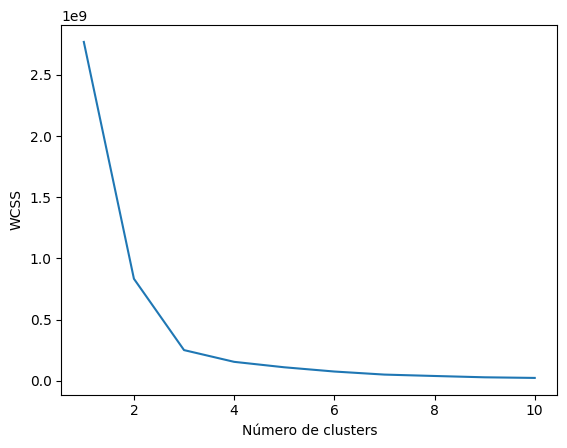

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [22]:
df['cluster'] = y_kmeans
df.head()

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean,cluster
0,0,s_320_045_split_1,2,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542,1
1,1,s_320_015_split_0,2,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478,0
2,2,s_320_020_split_3,2,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834,0
3,3,c_770_005_split_3,0,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744,0
4,4,c_770_002_split_0,0,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385,1


In [23]:
df.cluster.value_counts()

0    202
1    162
Name: cluster, dtype: int64

In [24]:
df.to_csv('kmeans_output.csv')

# .

In [3]:
exp_clu101 = setup(df, normalize=True, ignore_features=['Unnamed: 0', 'Experiment'], session_id=123)

NameError: name 'setup' is not defined

In [ ]:
kmeans = create_model('kmeans', num_clusters = 2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5212,172.3797,1.0858,0,0,0


In [ ]:
print(kmeans)

KMeans(n_clusters=2, random_state=123)


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean,Cluster
0,s,0.005482,0.002285,0.005940,-0.684501,13046.608398,0.019401,0.005217,2.709846,2.934680,3.084994,0.016095,3075.253906,3314.593262,0.617542,Cluster 1
1,s,0.005475,0.002081,0.005857,-0.254890,7052.356934,0.041907,0.005266,4.755545,5.084255,5.289695,0.027854,119.866402,696.665100,0.406478,Cluster 1
2,s,0.005492,0.001971,0.005835,-1.170823,8819.340820,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598801,-1207.787964,0.159834,Cluster 1
3,c,0.005414,0.040638,0.040996,0.898666,4733.248535,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862488,-845.862915,6.028744,Cluster 0
4,c,0.005469,0.014140,0.015160,3.312443,1899.488770,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575134,959.974426,1.305385,Cluster 0


In [ ]:
plot_model(kmeans) # 0 seems to be "s" (without chatter)\ and 1 seems to be "c" (with chatter)

In [ ]:
df.chatter_presence.value_counts()

s    200
c     88
i     76
Name: chatter_presence, dtype: int64

In [ ]:
plot_model(kmeans, plot = 'distribution')
# cluster 0 has way more occurence than s

# ap

In [ ]:
ap = create_model('ap', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2327,97.5647,1.0634,0,0,0


In [ ]:
ap_results = assign_model(ap)
ap_results.head()

,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean,Cluster
0,s,0.005482,0.002285,0.005940,-0.684501,13046.608398,0.019401,0.005217,2.709846,2.934680,3.084994,0.016095,3075.253906,3314.593262,0.617542,Cluster 10
1,s,0.005475,0.002081,0.005857,-0.254890,7052.356934,0.041907,0.005266,4.755545,5.084255,5.289695,0.027854,119.866402,696.665100,0.406478,Cluster 7
2,s,0.005492,0.001971,0.005835,-1.170823,8819.340820,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598801,-1207.787964,0.159834,Cluster 12
3,c,0.005414,0.040638,0.040996,0.898666,4733.248535,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862488,-845.862915,6.028744,Cluster 0
4,c,0.005469,0.014140,0.015160,3.312443,1899.488770,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575134,959.974426,1.305385,Cluster 11


In [ ]:
plot_model(ap) 

In [ ]:
plot_model(ap, plot = 'distribution')

In [ ]:
df.chatter_presence.value_counts()

s    200
c     88
i     76
Name: chatter_presence, dtype: int64

# meanshift

In [ ]:
meanshift = create_model('meanshift', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5800,44.0011,0.6265,0,0,0


In [ ]:
ms_results = assign_model(meanshift)
ms_results.head()

,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean,Cluster
0,s,0.005482,0.002285,0.005940,-0.684501,13046.608398,0.019401,0.005217,2.709846,2.934680,3.084994,0.016095,3075.253906,3314.593262,0.617542,Cluster 0
1,s,0.005475,0.002081,0.005857,-0.254890,7052.356934,0.041907,0.005266,4.755545,5.084255,5.289695,0.027854,119.866402,696.665100,0.406478,Cluster 0
2,s,0.005492,0.001971,0.005835,-1.170823,8819.340820,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598801,-1207.787964,0.159834,Cluster 0
3,c,0.005414,0.040638,0.040996,0.898666,4733.248535,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862488,-845.862915,6.028744,Cluster 1
4,c,0.005469,0.014140,0.015160,3.312443,1899.488770,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575134,959.974426,1.305385,Cluster 0


In [ ]:
plot_model(meanshift)

In [ ]:
plot_model(meanshift, plot='distribution')


In [ ]:
df.chatter_presence.value_counts()

s    200
c     88
i     76
Name: chatter_presence, dtype: int64